# Moving Average : Crossover 

In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")
import numpy as np
import math
%matplotlib inline

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (20,13)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2

# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)


In [2]:

#download data from yahoo! finance
"""
data source: http://finance.yahoo.com/
"""


class YahooDailyReader():
    
    def __init__(self, symbol=None, start=None, end=None):
        import datetime, time
        self.symbol = symbol
        
        # initialize start/end dates if not provided
        if end is None:
            end = datetime.datetime.today()
        if start is None:
            start = datetime.datetime(1980,2,1)
        
        self.start = start
        self.end = end
        
        # convert dates to unix time strings
        unix_start = int(time.mktime(self.start.timetuple()))
        day_end = self.end.replace(hour=23, minute=59, second=59)
        unix_end = int(time.mktime(day_end.timetuple()))
        
        url = 'https://finance.yahoo.com/quote/{}/history?'
        url += 'period1={}&period2={}'
        url += '&filter=history'
        url += '&interval=1d'
        url += '&frequency=1d'
        self.url = url.format(self.symbol, unix_start, unix_end)
        
    def read(self):
        import requests, re, json
       
        r = requests.get(self.url)
        
        ptrn = r'root\.App\.main = (.*?);\n}\(this\)\);'
        txt = re.search(ptrn, r.text, re.DOTALL).group(1)
        jsn = json.loads(txt)
        df = pd.DataFrame(
                jsn['context']['dispatcher']['stores']
                ['HistoricalPriceStore']['prices']
                )
        df.insert(0, 'symbol', self.symbol)
        df['Date'] = pd.to_datetime(df['date'], unit='s').dt.date
        
        # drop rows that aren't prices
        df = df.dropna(subset=['close'])
        
        df = df[['Date', 'high', 'low', 'open', 'close', 
                 'volume', 'adjclose']]
        df = df.set_index('Date')
        df.index=pd.to_datetime(df.index)
        return df
    




In [3]:
#import data
data = YahooDailyReader('%5EGSPC').read() 
data = data.iloc[::-1]

In [4]:
data.head(5)

,high,low,open,close,volume,adjclose
Date,,,,,,
1980-01-31,117.169998,113.779999,115.199997,114.160004,65900000,114.160004
1980-02-01,115.540001,113.129997,114.160004,115.120003,46610000,115.120003
1980-02-04,116.010002,113.830002,115.120003,114.370003,43070000,114.370003
1980-02-05,115.250000,112.150002,114.370003,114.660004,41880000,114.660004
1980-02-06,116.570000,113.650002,114.660004,115.720001,51950000,115.720001


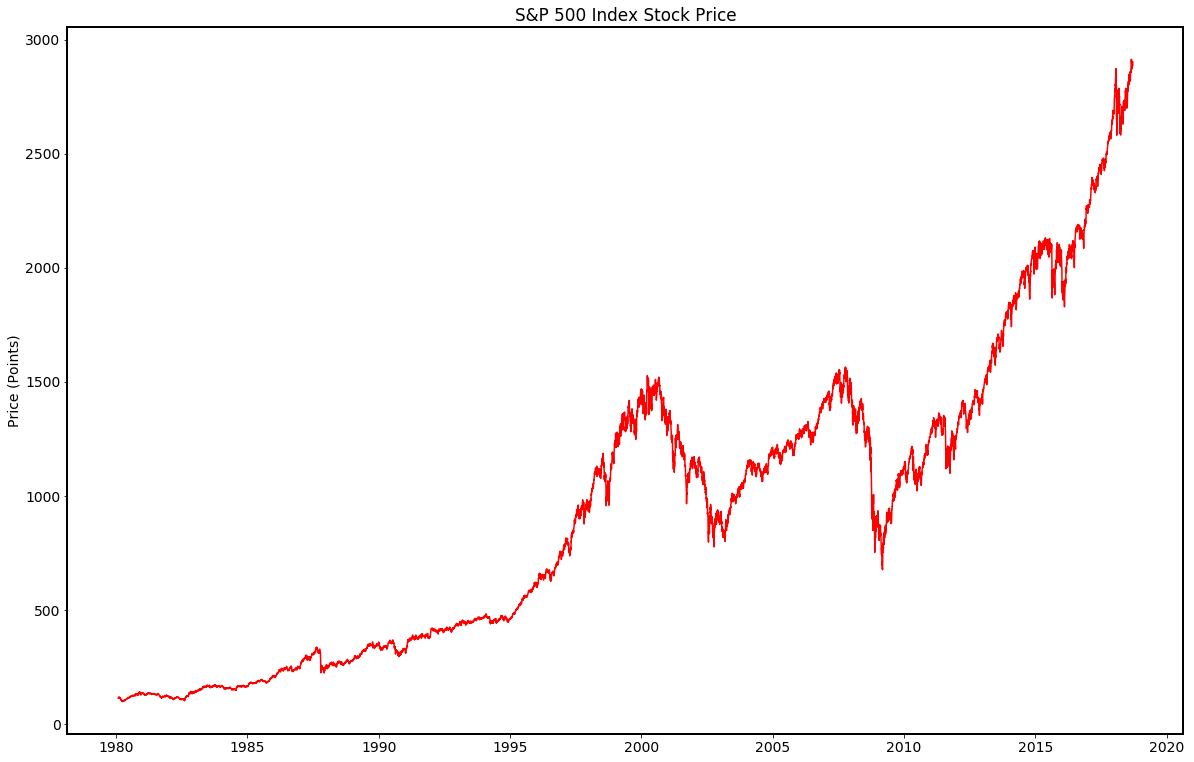

In [5]:
# The close accounts for stock splits, so that is what we should graph

plt.plot(data.index, data.close, 'r')
plt.title('S&P 500 Index Stock Price')
plt.ylabel('Price (Points)');
plt.show();


In [28]:
# Calculating the short-window simple moving average
short_rolling = data['close'].rolling(window=20).mean()
# Calculating the long-window simple moving average
long_rolling = data['close'].rolling(window=100).mean()
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = data['close'].ewm(span=20, adjust=False).mean()
# Using Pandas to calculate a 100-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_long = data['close'].ewm(span=100, adjust=False).mean()

# Simple Moving Average

Text(0,0.5,'Price')

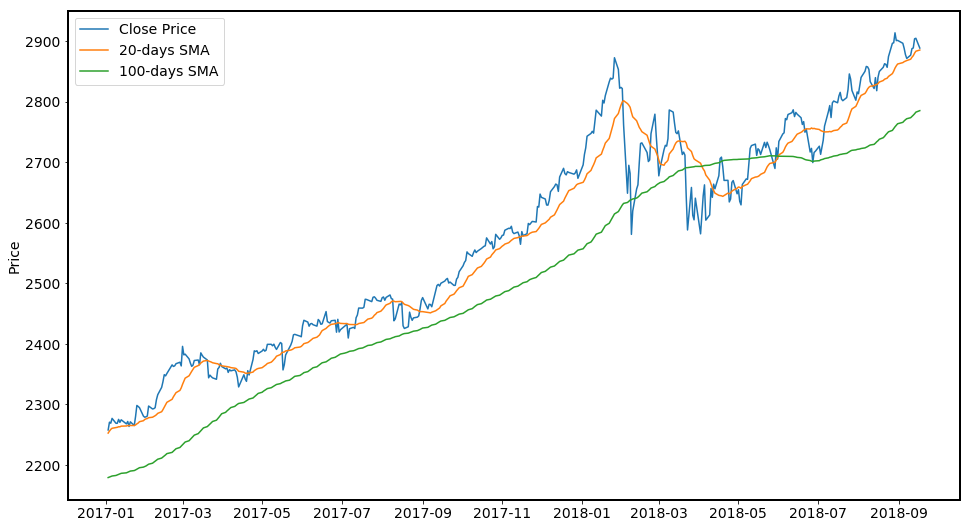

In [7]:
start_date = '2017-01-01'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:, :].index, data.loc[start_date:, 'close'], label='Close Price')
ax.plot(short_rolling.loc[start_date:].index, short_rolling.loc[start_date:], label = '20-days SMA')
ax.plot(long_rolling.loc[start_date:].index, long_rolling.loc[start_date:], label = '100-days SMA')
ax.legend(loc='best')
ax.set_ylabel('Price')


# Exponential Moving Average

Text(0,0.5,'Price (Points)')

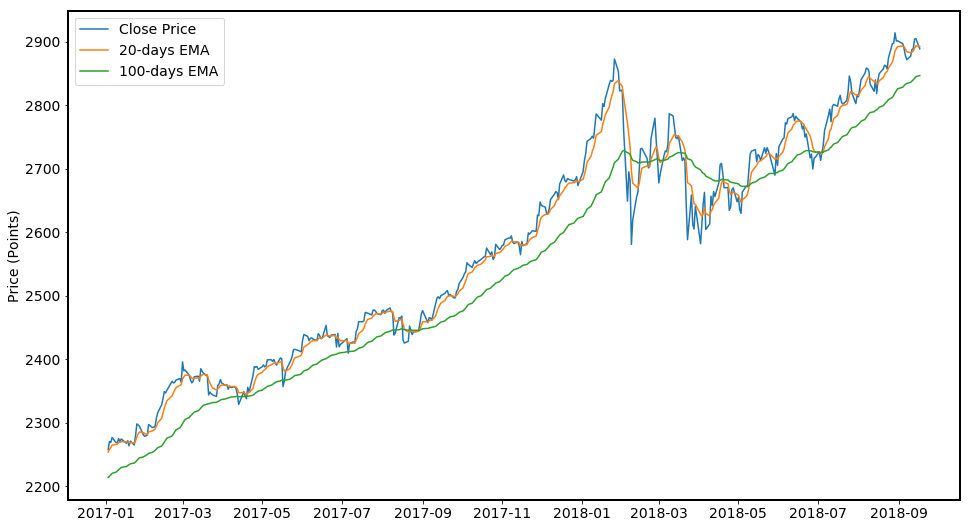

In [62]:
start_date = '2017-01-01'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:, :].index, data.loc[start_date:, 'close'], label='Close Price')
ax.plot(ema_short.loc[start_date:].index, ema_short.loc[start_date:], label = '20-days EMA')
ax.plot(ema_long.loc[start_date:].index, ema_long.loc[start_date:], label = '100-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price (Points)')

Text(0,0.5,'Price (Points)')

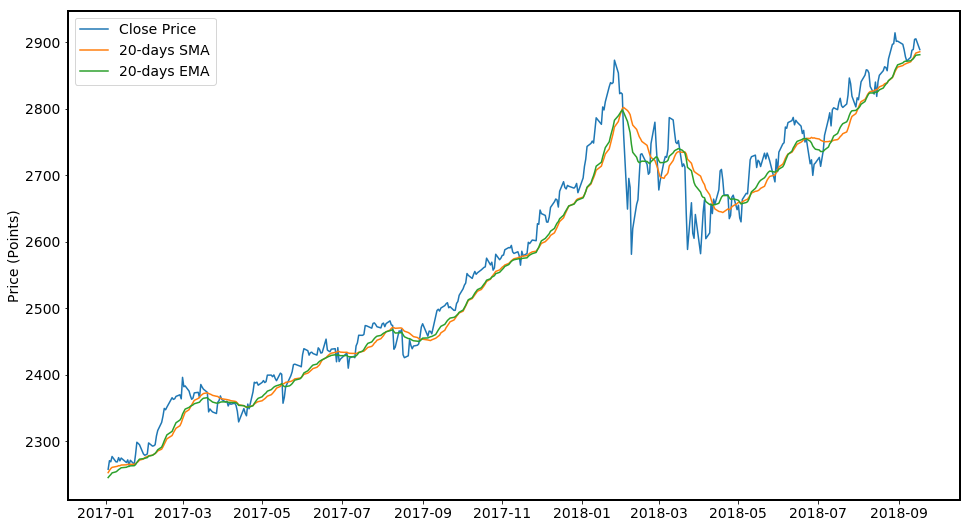

In [9]:
start_date = '2017-01-01'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:, :].index, data.loc[start_date:, 'close'], label='Close Price')
ax.plot(short_rolling.loc[start_date:].index, short_rolling.loc[start_date:], label = '20-days SMA')
ax.plot(ema_short.loc[start_date:].index, ema_short.loc[start_date:], label = '20-days EMA')
ax.legend(loc='best')
ax.set_ylabel('Price (Points)')


Text(0,0.5,'Price')

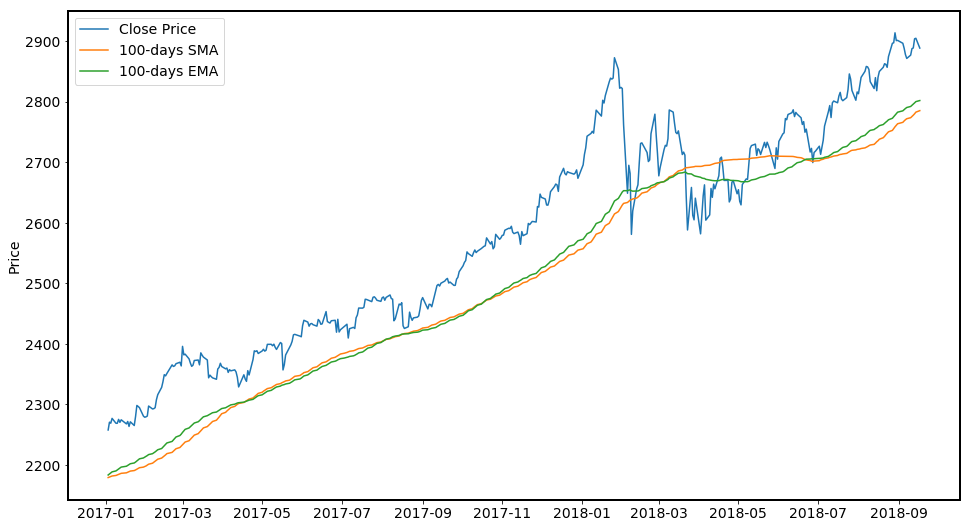

In [10]:
start_date = '2017-01-01'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:, :].index, data.loc[start_date:, 'close'], label='Close Price')
ax.plot(long_rolling.loc[start_date:].index, long_rolling.loc[start_date:], label = '100-days SMA')
ax.plot(ema_long.loc[start_date:].index, ema_long.loc[start_date:], label = '100-days EMA')
ax.legend(loc='best')
ax.set_ylabel('Price')

# Trading Strategy

Text(0,0.5,'Price (Points)')

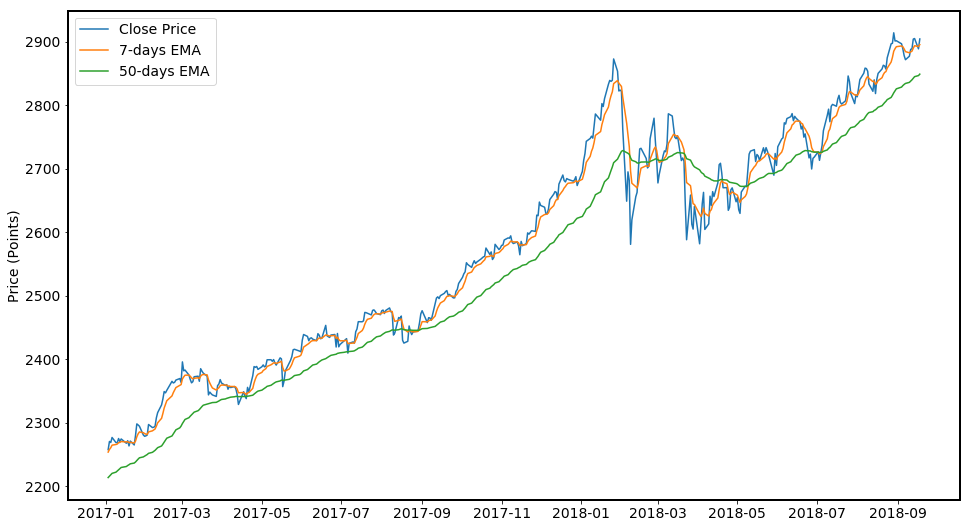

In [23]:
ema_short = data['close'].ewm(span=7, adjust=False).mean()
ema_long = data['close'].ewm(span=50, adjust=False).mean()

start_date = '2017-01-01'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:, :].index, data.loc[start_date:, 'close'], label='Close Price')
ax.plot(ema_short.loc[start_date:].index, ema_short.loc[start_date:], label = '7-days EMA')
ax.plot(ema_long.loc[start_date:].index, ema_long.loc[start_date:], label = '50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price (Points)')


In [24]:
def strategy_EMA(data, fma, sma , start_cash,count_transactions_ma):
    
    close_value = np.array(data.loc[start_date:,'close'])
    Threshold = 0.005
    difference = (fma-sma)/sma 
    difference = difference.loc[start_date:]
    difference = np.array(difference) #Take only the  values

    portfolio_value = 0 #The value that we have in the portfolio
    available_cash = start_cash 
    total_cash = available_cash + portfolio_value
    shares = 0 #The number of shares of the firm
    historical_of_trades = []
    historical = []
    historical.append(total_cash)
    difference_regime = []
    difference_regime = np.where(difference > Threshold,1,0)
    difference_regime = np.where(difference < -Threshold,-1,difference_regime)
    print(pd.DataFrame(difference_regime)[0].value_counts())
    for day in range(len(difference_regime)-1):
        decision = difference_regime[day] #Give a random number between 0 and 2 
        
        if decision == 0 : 
    #Buy Operation (buy 1 share of the value)
            if difference_regime[day-1] == 1: 
        #crossover from above : fma > sma in (day-1), crossover from above, thus we need to buy        
                shares += 1 #1 more share
                count_transactions_ma = count_transactions_ma+1
                available_cash -= 1*close_value[day]
                historical_of_trades.append(1.)
      

    #Sell Operation (sell 1 share of the value)    
            elif difference_regime[day-1] == -1: 
        #crossover from below : fma < sma in (day-1), crossover from below, thus we need to sell        
                shares -= 1 #1 more shares
                count_transactions_ma = count_transactions_ma+1                
                available_cash += 1*close_value[day]
                historical_of_trades.append(-1.)
                
        else: #Hold the stock (i.e do nothing)
            historical_of_trades.append(0)
        
        #Refresh the money that we have
        portfolio_value = shares*close_value[day]
        total_cash = portfolio_value + available_cash
        historical.append(total_cash)
    
    #return_value = 100*(total_cash - start_cash) / start_cash
    return(total_cash-start_cash,count_transactions_ma)

In [25]:
count_transactions_ma = 0
strategy_EMA(data, ema_short, ema_long , 10000, count_transactions_ma)

 1    346
 0     52
-1     33
Name: 0, dtype: int64


(1244.3203125, 9)

In [51]:
difference_regime

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

# Benchmark 

In [54]:
def benchmark_monkey(data, start_cash, count):
    """
        Create a random benchmark which acts randomly to buy / sell or hold each day.
        Return the total cash at the end.                   
    """
    close_value = data #data_test
    close_value = np.array(close_value) #Take only the close values

    portfolio_value = 0 #The value that we have in the portfolio
    available_cash = start_cash 
    total_cash = available_cash + portfolio_value
    shares = 0 #The number of shares of the firm
    historical_of_trades = []
    historical = []
    historical.append(total_cash)
    for day in range(len(close_value)):
        decision = random.randrange(0, 3) #Give a random number between 0 and 2 
        
        if decision == 0: #Buy Operation (buy 1 share of the value)
            if 1*close_value[day] <= available_cash: #If we have available money
                shares += 1 #1 more shares
                count = count + 1
                available_cash -= 1*close_value[day]
                historical_of_trades.append(1.)
        
        elif decision == 1: #Sell Operation
            if 1 <= shares: #If we can sell shares
                shares -= 1
                count = count + 1
                available_cash += 1 * close_value[day]
                historical_of_trades.append(-1.)
                
        else: #Hold the stock (i.e do nothing)
            historical_of_trades.append(0)
        #Refresh the money that we have
        portfolio_value = shares*close_value[day]
        total_cash = portfolio_value + available_cash
        historical.append(total_cash)
    
    #return_value = 100*(total_cash - start_cash) / start_cash
    return(total_cash,count)
   

In [57]:
def monte_carlo_benchmark(nb_test, start_cash, data):
    """ Run the Benchmark for many test, get the last value (or the return) for each test.
        Then plot the histogram of the money earn.
    """
    histo = []
    histo_count = []
    for i in range(nb_test):
        count=0
        value,count = benchmark_monkey(data, start_cash,count)
        histo.append(value)
        histo_count.append(count)
        
    histo = np.array(histo)
    histo_count = np.array(histo_count)

    mean_value = np.mean(histo)
    mean_value_c = np.mean(histo_count)
    
    print("The mean value of the benchmark is", mean_value)
    print("The mean value of the benchmark is", mean_value_c)

    plt.hist(histo)
    plt.title("Benchmark Monkey Histogram")
    plt.xlabel("Cash")
    plt.ylabel("Frequency")
    plt.show()
    #plt.savefig('images/histogram_benchmark_'+str(nb_test)+'_simulation.png', bbox_inches='tight', pad_inches=1, dpi=72)
    return(histo)

The mean value of the benchmark is 11210.9048213
The mean value of the benchmark is 225.50358


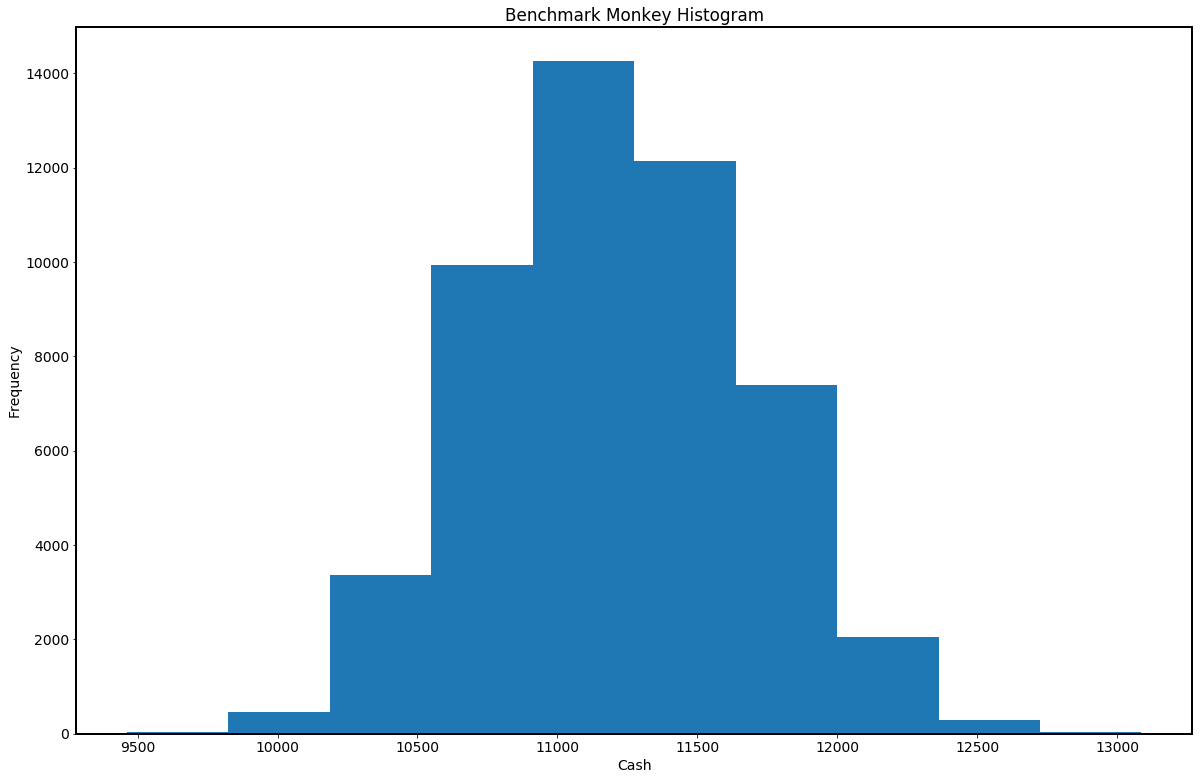

In [58]:
import random, timeit

#Give the histogram of the trading (Benchmark)
#Test for 30 000 values (start_cash = 5 000$)

histo = monte_carlo_benchmark(50000, 10000, data.loc[start_date:, 'close'])


